<a href="https://colab.research.google.com/github/sowmyakovur20/machinelearninghw/blob/main/ML_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

In [ ]:
ratingsm = pd.read_csv("/content/drive/MyDrive/archive/ratings_small.csv")
ratingsm.head(100)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
95,2,720,4.0,835355978
96,3,60,3.0,1298861675
97,3,110,4.0,1298922049
98,3,247,3.5,1298861637


In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 312kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617578 sha256=1be331b4d2118ee291b31b64fe959f30d7d449e66751c84552030e013f3ce2de
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import Reader, Dataset, SVD
from surprise import KNNBasic

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(ratingsm[['userId', 'movieId', 'rating']], reader)

**Computing the average MAE and RMSE of the Probabilistic Matrix Factorization(PMF)**

In [ ]:
pmf = SVD(biased=False)

pmf_output = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pmf_rmse_mean = pmf_output['test_rmse'].mean()
pmf_mae_mean = pmf_output['test_mae'].mean()
print("Average RMSE-Probabilistic Matrix Factorization(PMF): ", pmf_rmse_mean)
print("Average MAE-Probabilistic Matrix Factorization(PMF): ", pmf_mae_mean)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0134  1.0063  1.0170  1.0035  1.0114  1.0103  0.0049  
MAE (testset)     0.7812  0.7782  0.7852  0.7751  0.7784  0.7796  0.0034  
Fit time          5.56    5.10    5.24    5.41    5.30    5.32    0.16    
Test time         0.23    0.14    0.15    0.18    0.23    0.19    0.04    
Average RMSE-Probabilistic Matrix Factorization(PMF):  1.0103357813241467
Average MAE-Probabilistic Matrix Factorization(PMF):  0.7796200797212721


**Computing the average MAE and RMSE of the User based Collaborative Filtering**

In [ ]:
userbasedCF = KNNBasic(sim_options={'user_based':True})

userbasedCF_output = cross_validate(userbasedCF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
userbasedCF_rmse_mean = userbasedCF_output['test_rmse'].mean()
userbasedCF_mae_mean = userbasedCF_output['test_mae'].mean()
print("Average RMSE-User based Collaborative Filtering: ", userbasedCF_rmse_mean)
print("Average MAE-User based Collaborative Filtering: ", userbasedCF_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9629  0.9748  0.9595  0.9641  0.9746  0.9672  0.0063  
MAE (testset)     0.7404  0.7468  0.7365  0.7431  0.7513  0.7436  0.0051  
Fit time          0.18    0.25    0.24    0.25    0.20    0.22    0.03    
Test time         2.10    1.90    2.01    1.95    1.92    1.97    0.07    
Average RMSE-User based Collaborative Filtering:  0.967182388036109
Average MAE-User based Collaborative Filtering:  0.7436246340854812


**Computing the average MAE and RMSE of the Item based Collaborative Filtering**

In [ ]:
itembasedCF = KNNBasic(sim_options={'user_based':False})

itembasedCF_output = cross_validate(itembasedCF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
itembasedCF_rmse_mean = itembasedCF_output['test_rmse'].mean()
itembasedCF_mae_mean = itembasedCF_output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering: ", itembasedCF_rmse_mean)
print("Average MAE of the Item based Collaborative Filtering: ", itembasedCF_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9391  0.9344  0.9253  0.9452  0.9303  0.9348  0.0069  
MAE (testset)     0.7231  0.7208  0.7137  0.7273  0.7173  0.7205  0.0047  
Fit time          5.72    5.47    4.72    4.70    4.74    5.07    0.44    
Test time         8.99    9.32    9.20    9.47    9.49    9.29    0.19    
Average RMSE of the Item based Collaborative Filtering:  0.9348318639908374
Average MAE of the Item based Collaborative Filtering:  0.7204665250728587


**Impact the performances of User based Collaborative Filtering with MSD, Cosine and Pearson Similarity**

In [ ]:
#MSD similarity
userbasedCF_MSD = KNNBasic(sim_options={'name':'MSD', 'user_based':True})
#Cosine similarity
userbasedCF_cosine = KNNBasic(sim_options={'name':'cosine', 'user_based':True}) 
#Pearson similarity
userbasedCF_pearson = KNNBasic(sim_options={'name':'pearson', 'user_based':True}) 
print("User based collaborative Filtering with MSD similarity function:")
userbasedCF_MSD_Output = cross_validate(userbasedCF_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("User based collaborative Filtering with cosine similarity function:")
userbasedCF_Cosine_Output = cross_validate(userbasedCF_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("User based collaborative Filtering with pearson similarity function:")
userbasedCF_Pearson_Output = cross_validate(userbasedCF_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

User based collaborative Filtering with MSD similarity function:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9702  0.9548  0.9645  0.9810  0.9679  0.9677  0.0085  
MAE (testset)     0.7445  0.7369  0.7419  0.7510  0.7454  0.7439  0.0046  
Fit time          0.18    0.26    0.25    0.21    0.24    0.23    0.03    
Test time         2.06    1.97    1.93    2.13    2.11    2.04    0.08    
User based collaborative Filtering with cosine similarity function:
Computing the cosine similarity matrix...
Done computing similarity 

In [ ]:
userbasedCF_MSD_rmse_mean = userbasedCF_MSD_Output['test_rmse'].mean()
userbasedCF_MSD_mae_mean = userbasedCF_MSD_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with MSD similarity function: ", userbasedCF_MSD_rmse_mean)
print("Average MAE of the User based Collaborative Filtering with MSD similarity function: ", userbasedCF_MSD_mae_mean)
userbasedCF_Cosine_rmse_mean = userbasedCF_Cosine_Output['test_rmse'].mean()
userbasedCF_Cosine_mae_mean = userbasedCF_Cosine_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with Cosine similarity function: ", userbasedCF_Cosine_rmse_mean)
print("Average MAE of the User based Collaborative Filtering with Cosine similarity function: ", userbasedCF_Cosine_mae_mean)
userbasedCF_Pearson_rmse_mean = userbasedCF_Pearson_Output['test_rmse'].mean()
userbasedCF_Pearson_mae_mean = userbasedCF_Pearson_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with Pearson similarity function: ", userbasedCF_Pearson_rmse_mean)
print("Average MAE of the User based Collaborative Filtering with Pearson similarity function: ", userbasedCF_Pearson_mae_mean)

Average RMSE of the User based Collaborative Filtering with MSD similarity function:  0.967692880550549
Average MAE of the User based Collaborative Filtering with MSD similarity function:  0.7439415046416986
Average RMSE of the User based Collaborative Filtering with Cosine similarity function:  0.9945586864554473
Average MAE of the User based Collaborative Filtering with Cosine similarity function:  0.768332867453013
Average RMSE of the User based Collaborative Filtering with Pearson similarity function:  0.9986746605811104
Average MAE of the User based Collaborative Filtering with Pearson similarity function:  0.774037542515096


**Impact the performances of Item based Collaborative Filtering with MSD, Cosine and Pearson Similarity**

In [ ]:
# item based CF with MSD similarity
itembasedCF_MSD = KNNBasic(sim_options={'name':'MSD', 'user_based':False})
# item based CF with cosine similarity
itembasedCF_cosine = KNNBasic(sim_options={'name':'cosine', 'user_based':False}) 
# item based CF with pearson similarity
itembasedCF_pearson = KNNBasic(sim_options={'name':'pearson', 'user_based':False}) 
print("Item based collaborative Filtering with MSD similarity function:")
itembasedCF_MSD_Output = cross_validate(itembasedCF_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Item based collaborative Filtering with cosine similarity function:")
itembasedCF_Cosine_Output = cross_validate(itembasedCF_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Item based collaborative Filtering with pearson similarity function:")
itembasedCF_Pearson_Output = cross_validate(itembasedCF_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Item based collaborative Filtering with MSD similarity function:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9265  0.9316  0.9330  0.9450  0.9374  0.9347  0.0062  
MAE (testset)     0.7137  0.7188  0.7236  0.7253  0.7214  0.7206  0.0041  
Fit time          4.62    4.83    4.83    5.09    4.90    4.85    0.15    
Test time         8.50    9.18    9.31    9.60    9.06    9.13    0.36    
Item based collaborative Filtering with cosine similarity function:
Computing the cosine similarity matrix...
Done computing similarity 

In [ ]:
itembasedCF_MSD_rmse_mean = itembasedCF_MSD_Output['test_rmse'].mean()
itembasedCF_MSD_mae_mean = itembasedCF_MSD_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with MSD similarity function: ", itembasedCF_MSD_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with MSD similarity function: ", itembasedCF_MSD_mae_mean)
itembasedCF_Cosine_rmse_mean = itembasedCF_Cosine_Output['test_rmse'].mean()
itembasedCF_Cosine_mae_mean = itembasedCF_Cosine_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with Cosine similarity function: ", itembasedCF_Cosine_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with Cosine similarity function: ", itembasedCF_Cosine_mae_mean)
itembasedCF_Pearson_rmse_mean = itembasedCF_Pearson_Output['test_rmse'].mean()
itembasedCF_Pearson_mae_mean = itembasedCF_Pearson_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with Pearson similarity function: ", itembasedCF_Pearson_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with Pearson similarity function: ", itembasedCF_Pearson_mae_mean)

Average RMSE of the Item based Collaborative Filtering with MSD similarity function:  0.9346895232467543

Average MAE of the Item based Collaborative Filtering with MSD similarity function:  0.7205737266925504
Average RMSE of the Item based Collaborative Filtering with Cosine similarity function:  0.9957104708137953

Average MAE of the Item based Collaborative Filtering with Cosine similarity function:  0.7753455526426684
Average RMSE of the Item based Collaborative Filtering with Pearson similarity function:  0.9891342390094738

Average MAE of the Item based Collaborative Filtering with Pearson similarity function:  0.7677394520927159


**Comparing the impact of three metrics on User Based CF with the impact of three metrics on Item Based CF**

In [ ]:
userbased_rmse_list = []
userbased_mae_list = []
itembased_rmse_list = []
itembased_mae_list = []

userbased_rmse_list.append(userbasedCF_MSD_rmse_mean);
userbased_rmse_list.append(userbasedCF_Cosine_rmse_mean);
userbased_rmse_list.append(userbasedCF_Pearson_rmse_mean);

userbased_mae_list.append(userbasedCF_MSD_mae_mean);
userbased_mae_list.append(userbasedCF_Cosine_mae_mean);
userbased_mae_list.append(userbasedCF_Pearson_mae_mean);

itembased_rmse_list.append(itembasedCF_MSD_rmse_mean);
itembased_rmse_list.append(itembasedCF_Cosine_rmse_mean);
itembased_rmse_list.append(itembasedCF_Pearson_rmse_mean);

itembased_mae_list.append(itembasedCF_MSD_mae_mean);
itembased_mae_list.append(itembasedCF_Cosine_mae_mean);
itembased_mae_list.append(itembasedCF_Pearson_mae_mean);

list = []
list.append('MSD');
list.append('Cosine');
list.append('Pearson');


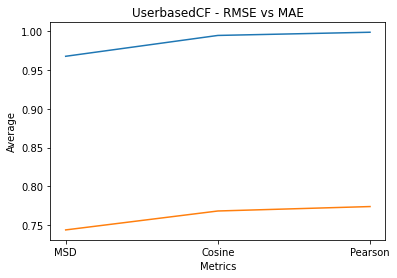

In [ ]:
plt.title('UserbasedCF - RMSE vs MAE')

plt.plot(list, userbased_rmse_list, label = 'User Based')
plt.plot(list, userbased_mae_list, label = 'User Based')

plt.xlabel('Metrics')
plt.ylabel('Average')
plt.show()

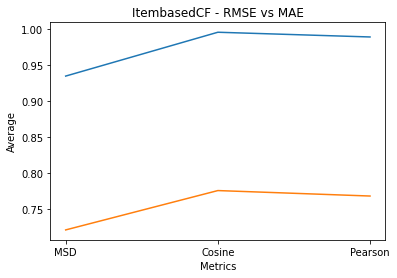

In [ ]:
plt.title('ItembasedCF - RMSE vs MAE')

plt.plot(list, itembased_rmse_list, label = 'Item Based')
plt.plot(list, itembased_mae_list, label = 'Item Based')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.show()

In [17]:
k_list = [i for i in range(1,101)]
userbased_rmsemean_list = []
userbased_maemean_list = []
itembased_rmsemean_list = []
itembased_maemean_list = []
for k in range(1,101):
    
    userbased_CF = KNNBasic(k=k, sim_options={'user_based': True})
    print("User based Collarborative filtering with k=",k, ":")
    userbased_output = cross_validate(userbased_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    userbased_rmsemean_list.append(userbased_output['test_rmse'].mean())
    userbased_maemean_list.append(userbased_output['test_mae'].mean())
    itembased_CF = KNNBasic(k=k, sim_options={'user_based': False})
    print("Item based Collarborative filtering with k=", k, ":")
    itembased_output = cross_validate(itembased_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    itembased_rmsemean_list.append(itembased_output['test_rmse'].mean())
    itembased_maemean_list.append(itembased_output['test_mae'].mean())

User based Collarborative filtering with k= 1 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2156  1.1952  1.2223  1.2031  1.2150  1.2102  0.0097  
MAE (testset)     0.9065  0.8908  0.9158  0.8987  0.9103  0.9044  0.0088  
Fit time          0.23    0.23    0.27    0.21    0.21    0.23    0.02    
Test time         1.02    1.51    1.02    1.41    0.99    1.19    0.22    
Item based Collarborative filtering with k= 1 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity mat

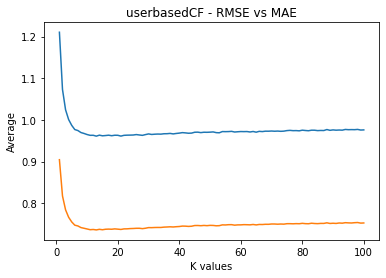

In [19]:
plt.title('userbasedCF - RMSE vs MAE')

plt.plot(k_list, userbased_rmsemean_list, label = 'User Based')
plt.plot(k_list, userbased_maemean_list, label = 'User Based')
plt.xlabel('K values')
plt.ylabel('Average')
plt.show()

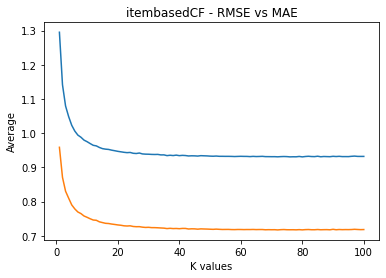

In [20]:
plt.title('itembasedCF - RMSE vs MAE')

plt.plot(k_list, itembased_rmsemean_list, label = 'Item Based')
plt.plot(k_list, itembased_maemean_list, label = 'Item Based')
plt.xlabel('K values')
plt.ylabel('Average')
plt.show()